In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
# Check matplotlib version
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)

3.7.2
2.0.3
1.24.3


**Matplotlib** employs a hierarchical structure, with a `figure` object on top. A figure is a container that consists of many different elements, including axes. A figure can change the graph size, manage titles, and figure legends among other things. An `axis` is an object that takes data and visualizes it on the plot one figure can have several axes that correspond to different subgraphs.

Now let's create our first graph:

/tmp/ipykernel_1413145/2256854355.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


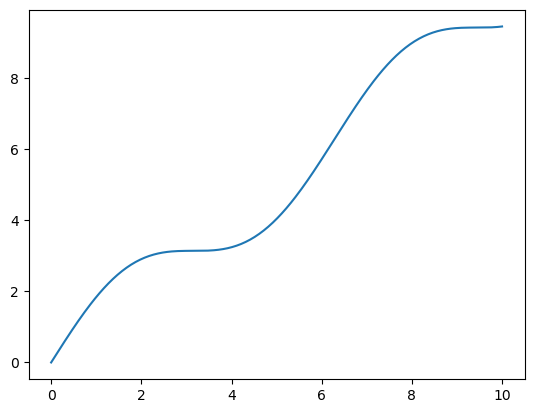

In [3]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 300)
y = np.sin(x) + x
ax.plot(x, y)
fig.show()

There is also another way to create a figure in `matplotlib`:

```plt.figure()```

This code looks a bit simpler but that's the only positive side. A lot of times, you need to draw several plots in succession. Matplotlib employs an "active figure" concept. Suppose, we need to implement `plt.figure(num)` in our program. In this case, it creates a new figure, assigns it with a `num` number and makes it active. If we want to go back to one of the previous charts, we need to refer to the specific figure instead of creating a new one. To do so, we need to track its number — say, 7 — and activate the desired figure with the `plt.figure(7)` command.

Besides, the `plt.subplots()` function is crucial when you want to create a plot consisting of several parts.

## Plot settings

Now let's customize our plot and learn some of the basic settings.

The `figsize` argument sets the figure `length` and `width`:

`fig, ax = plt.subplots(figsize=(15,10))`

The `suptitle` method sets the figure's `title`.

`fig.suptitle('Our First plot', fontsize=40)`

We can also set line `color`, `style`, and `width`.To change the line appearance the `linestyles` is used. Additional width will make our line a bit thicker for a better visual appearance.

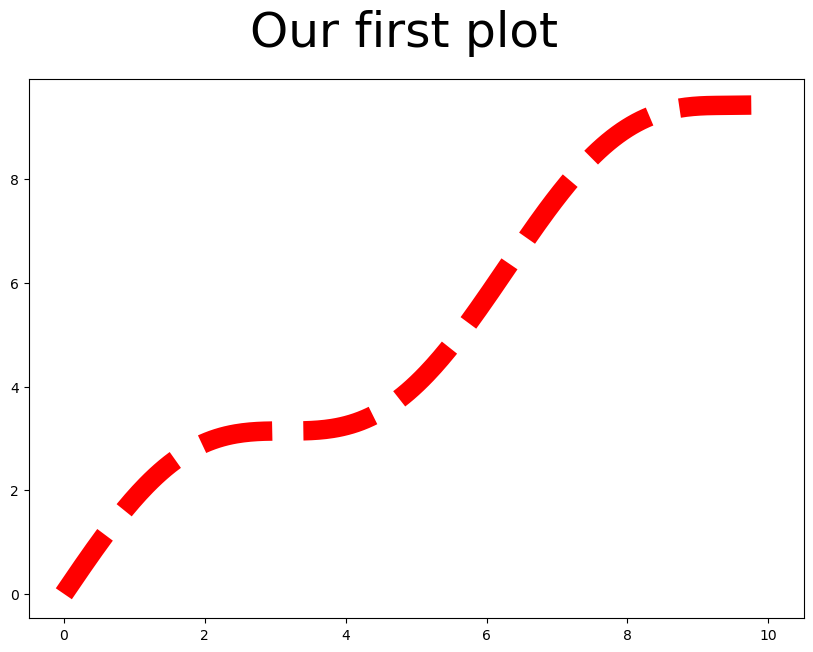

In [4]:
color = 'r'
linestyle = 'dashed'
linewidth = 14
fig, ax = plt.subplots(figsize=(10, 7))
fig.suptitle('Our first plot', fontsize=35)
ax.plot(x, y, c=color, linestyle=linestyle, linewidth=linewidth)
plt.show()

### Axes settings
Let's get a glance at some of the Axes class properties.To name our `x` and `y` axes. We can pass any keyword arguments:

    ax.set_ylabel('function', fontsize = 30)
    ax.set_xlabel('argument', fontsize = 30)

The Axes object has two child objects: `xaxis` and `yaxis`. Each of them has its own ticks with bound labels — in our case, the numbers under the axis line. We can subsequently iterate through them, changing their `size`:

    for xtick in ax.xaxis.get_major_ticks():
        xtick.label.set_fontsize(18)

    for ytick in ax.yaxis.get_major_ticks():
        ytick.label.set_fontsize(18)

/tmp/ipykernel_1413145/2604592856.py:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  xtick.label.set_fontsize(18)
/tmp/ipykernel_1413145/2604592856.py:10: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  ytick.label.set_fontsize(34)


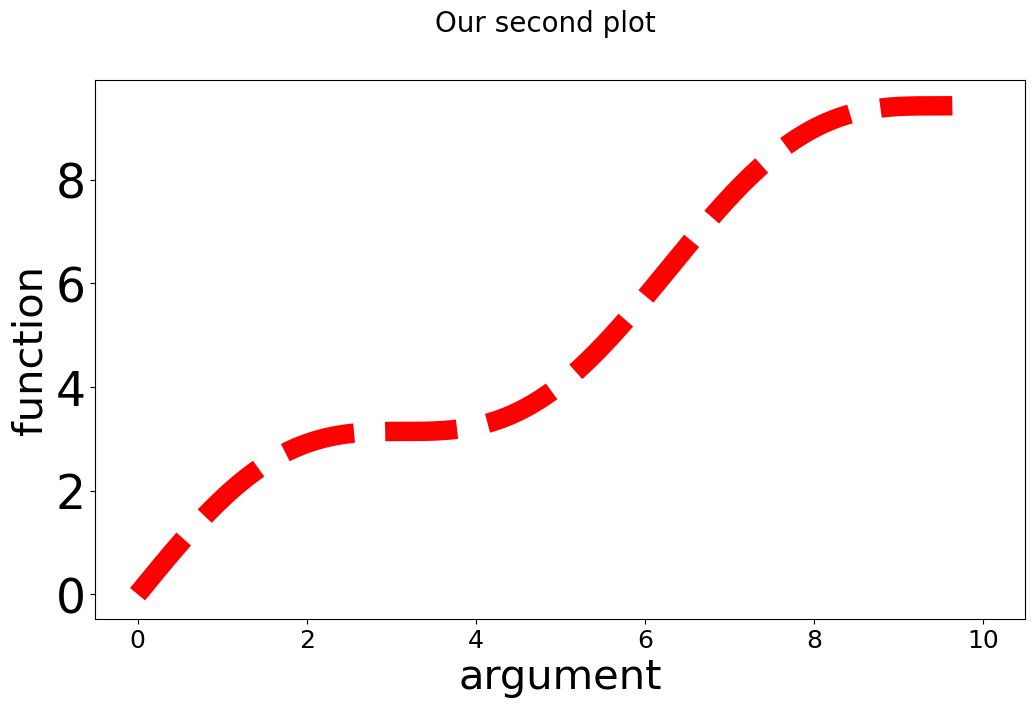

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
fig.suptitle('Our second plot', fontsize=20)
ax.plot(x, y, c=color, linestyle=linestyle, linewidth=linewidth)
ax.set_ylabel('function', fontsize = 30)
ax.set_xlabel('argument', fontsize = 30)
for xtick in ax.xaxis.get_major_ticks():
    xtick.label.set_fontsize(18)

for ytick in ax.yaxis.get_major_ticks():
    ytick.label.set_fontsize(34)
plt.show()

### Multiple subplots

The `plt.subplots()` method is the best way to handle several subplots at once. Let's create a plot in three parts:

In [6]:
x = np.linspace(0, 10, 500)
x

array([ 0.        ,  0.02004008,  0.04008016,  0.06012024,  0.08016032,
        0.1002004 ,  0.12024048,  0.14028056,  0.16032064,  0.18036072,
        0.2004008 ,  0.22044088,  0.24048096,  0.26052104,  0.28056112,
        0.3006012 ,  0.32064128,  0.34068136,  0.36072144,  0.38076152,
        0.4008016 ,  0.42084168,  0.44088176,  0.46092184,  0.48096192,
        0.501002  ,  0.52104208,  0.54108216,  0.56112224,  0.58116232,
        0.6012024 ,  0.62124248,  0.64128257,  0.66132265,  0.68136273,
        0.70140281,  0.72144289,  0.74148297,  0.76152305,  0.78156313,
        0.80160321,  0.82164329,  0.84168337,  0.86172345,  0.88176353,
        0.90180361,  0.92184369,  0.94188377,  0.96192385,  0.98196393,
        1.00200401,  1.02204409,  1.04208417,  1.06212425,  1.08216433,
        1.10220441,  1.12224449,  1.14228457,  1.16232465,  1.18236473,
        1.20240481,  1.22244489,  1.24248497,  1.26252505,  1.28256513,
        1.30260521,  1.32264529,  1.34268537,  1.36272545,  1.38

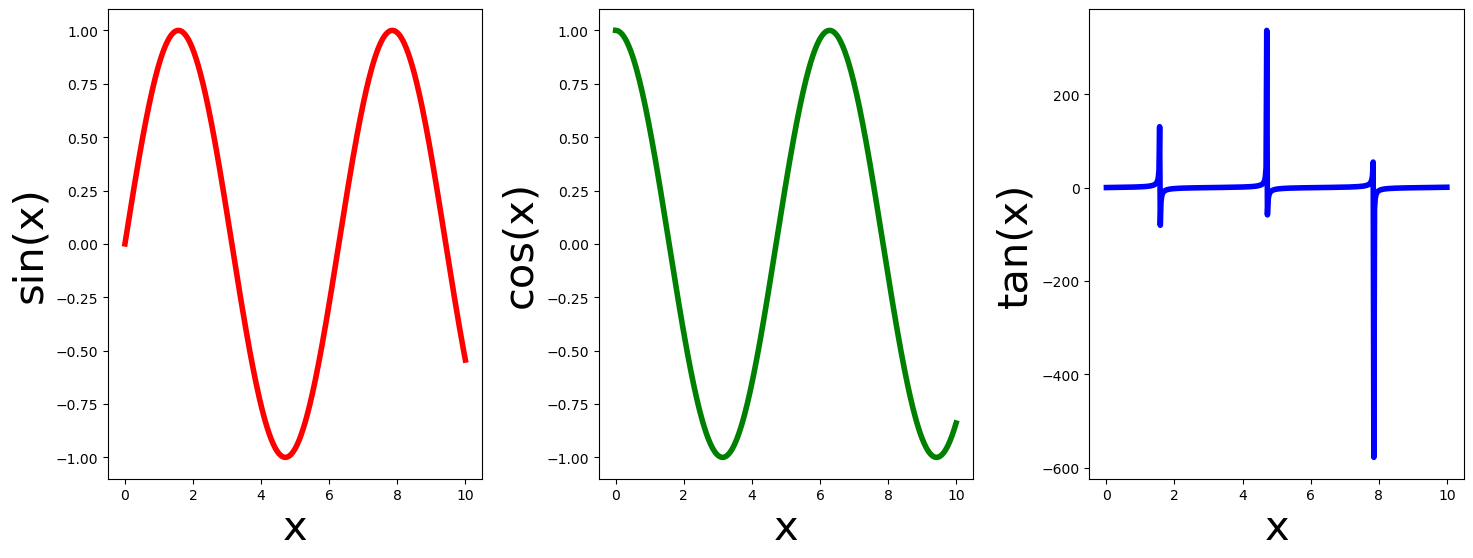

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax1, ax2, ax3 = axes
x = np.linspace(0, 10, 500)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

ax1.set_ylabel('sin(x)', fontsize=30)
ax1.set_xlabel('x', fontsize=30)
ax2.set_ylabel('cos(x)', fontsize=30)
ax2.set_xlabel('x', fontsize=30)
ax3.set_ylabel('tan(x)', fontsize=30)
ax3.set_xlabel('x', fontsize=30)

fig.tight_layout(pad=2)

ax1.plot(x, y1, c='r', linewidth=4)
ax2.plot(x, y2, c='g', linewidth=4)
ax3.plot(x, y3, c='b', linewidth=4)
plt.show()

## Some other example
### World population graph

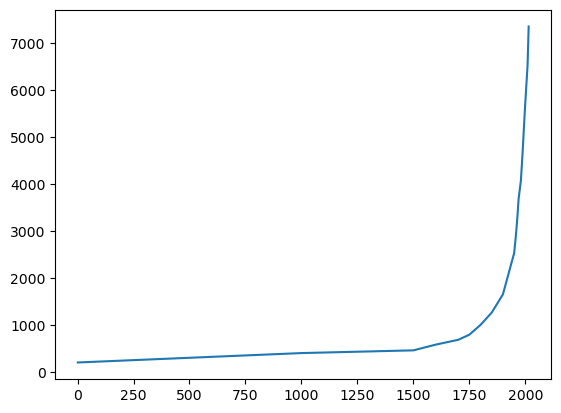

In [8]:
years=[1,1000,1500,1600,1700,1750,1800,1850,1900,1950,1955,1960,1965,1970,1980,1985,1990,
       1995,2000,2005,2010,2015]
pops=[200,400,458,580,682,791,1000,1262,1650,2525,2758,3018,3322,3682,
      4061,4440,4853,5310,5735,6127,6520,7349] # Maybe this is in millions

plt.plot(years, pops)
plt.show()

###  Adding labels and custom line color

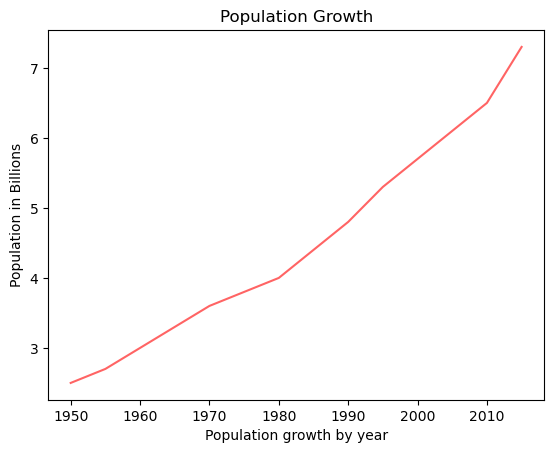

In [9]:
years=[1950,1955,1960,1965,1970,1980,1985,1990,1995,2000,2005,2010,2015]
pops=[2.5,2.7,3.0,3.3,3.6,4.0,4.4,4.8,5.3,5.7,6.1,6.5,7.3] # Maybe this is in billions
plt.plot(years,pops,color=(255/255,100/255,100/255))
plt.ylabel("Population in Billions")
plt.xlabel("Population growth by year")
plt.title("Population Growth")
plt.show()

### Legends, Titles, and Labels

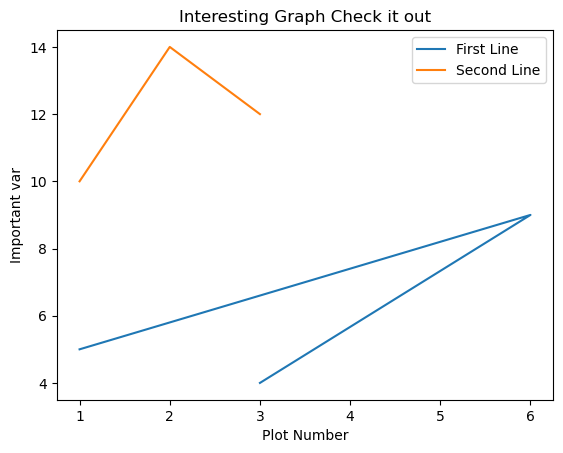

In [10]:
x = [1,6,3]
y = [5,9,4]

x2 = [1,2,3]
y2 = [10,14,12]

plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph Check it out')
plt.legend()
plt.show()

### Multiple lines and line styling

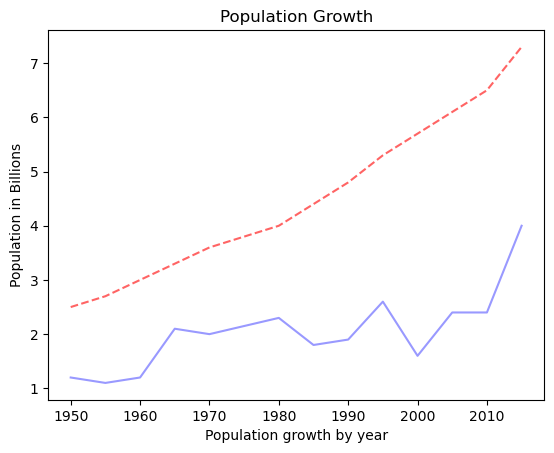

In [11]:
years=[1950,1955,1960,1965,1970,1980,1985,1990,1995,2000,2005,2010,2015]
pops=[2.5,2.7,3.0,3.3,3.6,4.0,4.4,4.8,5.3,5.7,6.1,6.5,7.3]
death=[1.2,1.1,1.2,2.1,2.0,2.3,1.8,1.9,2.6,1.6,2.4,2.4,4.0]
plt.plot(years,pops,'--',color=(255/255,100/255,100/255))
plt.plot(years,death,color=(.6,.6,1))
plt.ylabel("Population in Billions")
plt.xlabel("Population growth by year")
plt.title("Population Growth")
plt.show()

### Configuring the graph

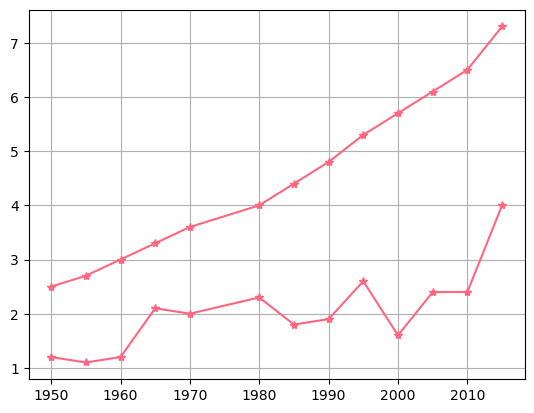

In [12]:
years=[1950,1955,1960,1965,1970,1980,1985,1990,1995,2000,2005,2010,2015]
pops=[2.5,2.7,3.0,3.3,3.6,4.0,4.4,4.8,5.3,5.7,6.1,6.5,7.3]
death=[1.2,1.1,1.2,2.1,2.0,2.3,1.8,1.9,2.6,1.6,2.4,2.4,4.0]
lines=plt.plot(years,pops,years,death)
plt.grid(True)
plt.setp(lines,color=(1,.4,.5),marker='*')
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The pie chart</h1>

A `pie chart` is a circular plot that shows how data items relate to one another. The `pie chart` total area is the data percentage. The area of `slices` (also called `wedges`) represents the percentage of data parts and shows the relation between them. `Pie charts` are good when we need to compare parts of a whole.

### Creating a pie chart
To create a pie chart using matplotlib, refer to the pie`() function`.

```plt.pie(data)```

where `data` is an array of data values that you want to plot.

There are many other optional parameters that can pass to `plt.pie()`. Some of them include:

- `explode` allows separating slices of a pie chart
- `labels` is a list of strings that sets the label of each corresponding slice
- `labeldistance` determines the radial distance at which pie labels are drawn (default is `1.1`)
- `color` colors slices
- `shadow` creates the shadow of a slice
- `startangle` lets you choose the starting angle of a plot
- `wedgeprops` lets you tune various slice parameters
- `radius` sets the radius of the circle(by default, it is `1`)

Let's create simple pie chart. Assume our data represents the result of a survey on a favorite programming language:

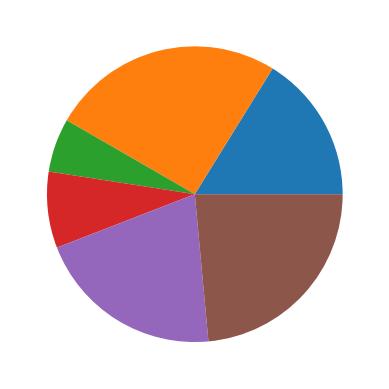

In [40]:
data=[33,52,12,17,42,48]
plt.pie(data)
plt.show()

### Labels
Adding labels to a pie chart is pretty straightforward just need to pass a list of strings with labels corresponding to the list of values:

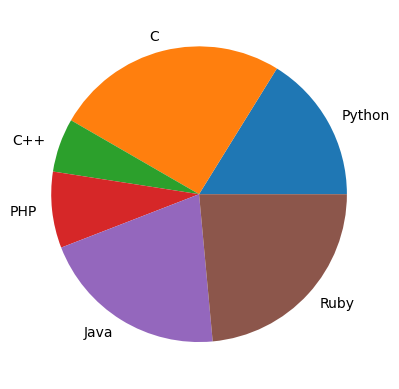

In [41]:
labels=['Python','C','C++','PHP','Java','Ruby']
plt.pie(data,labels=labels)
plt.show()

Now let's customize the pie chart with adding a legend and title the whole graph.

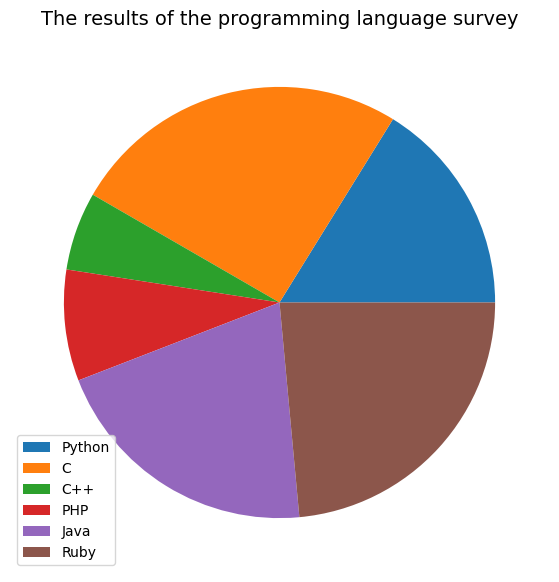

In [42]:
plt.figure(figsize=(9, 7))
plt.pie(data)
plt.title('The results of the programming language survey', fontsize=14)
plt.legend(labels)
plt.show()

### Explode
The `explode` parameter in `pie charts` separates a slice from the main pie. To highlight some of the fractions, we need to pass a list of values to the explode parameter. The values determine how far we want to separate this category from the main pie.

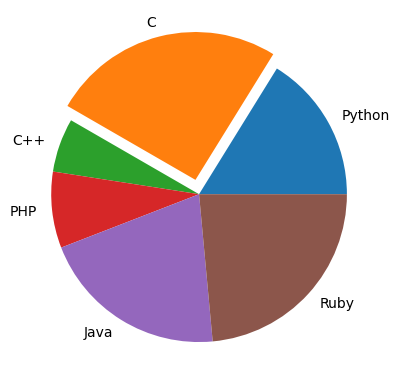

In [43]:
explode = [0.0, 0.1, 0.0, 0.0,0.0,0.0]
plt.pie(data, explode=explode, labels=labels)
plt.show()

### Colors and shadows
To make our graph even more illustrative, we can pass a list of colors to the color parameter and add a shadow underneath by setting the `shadow` to `True`:

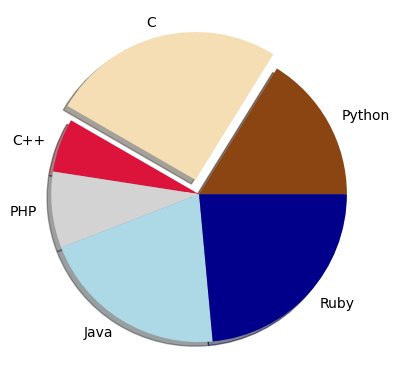

In [44]:
colors = ['saddlebrown', 'wheat', 'crimson', 'lightgrey','lightblue','darkblue']
plt.pie(data,
        explode=explode,
        labels=labels,
        colors=colors,
        shadow=True)
plt.show()

### Display the value
The `autopct` parameter displays the percent value on the slices.
If `autopct` is `%.2f`, then for each pie slice, the format string is `%.2f`, where `% `is a special character that tells when to type the value, `f` sets the result to be a floating-point type, and the `.2` sets a limit to only 2 digits after the point.

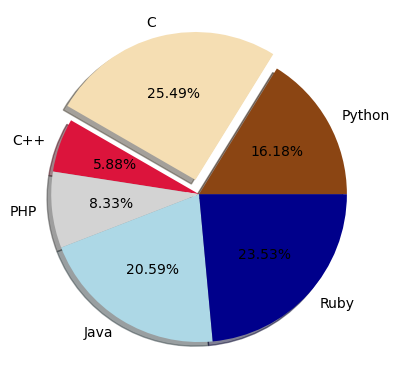

In [45]:
plt.pie(data,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%.2f%%',    # here we also add the % sign
        shadow=True)
plt.show()

### Starting angle
By default, pie charts are plotted from the x-axis; slices are plotted counterclockwise:

The `startangle` parameter lets us define the angle where we want to initiate our pie (the default angle is 0). You can choose whether you want to plot the slices counterclockwise by changing the counterclock parameter; it is `True by` default.

Let's assume we want the slices to start at 90 degrees.

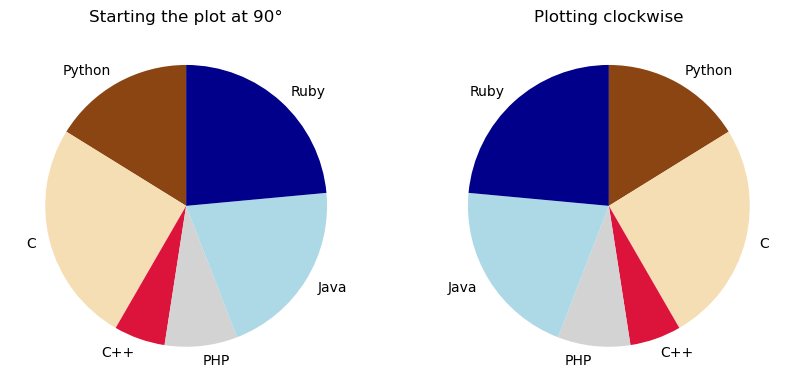

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax1, ax2 = axes

ax1.pie(data, labels=labels, colors=colors, startangle=90)
ax2.pie(data, labels=labels, colors=colors, startangle=90, counterclock=False)
ax1.set_title('Starting the plot at 90°')
ax2.set_title('Plotting clockwise')
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The doughnut chart</h1>
A doughnut chart is very similar to a pie chart. However, since a doughnut chart has an opening at the center, it makes slices look more like bars.
Unfortunately, there is no specific method for plotting a doughnut chart in the matplotlib library. But we can use the `wedgeprops` parameter to define the width of the wedges.

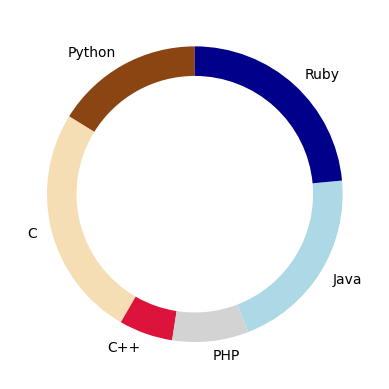

In [47]:
plt.pie(data, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.2})
plt.show()

The `wedgeprops` parameter also lets we change various pie slice features, such as `linewidth`, `edgecolor`, `alpha` (for transparency), and many others.

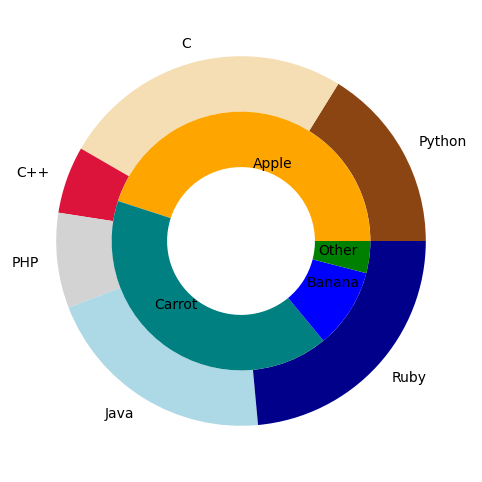

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.3

p_pie = ax.pie(data, radius=1, labels=labels, colors=colors, wedgeprops={'width': width})

fruit_data = [45, 41, 10, 4]
fruit_labels = ['Apple', 'Carrot', 'Banana', 'Other']
fruit_color = ['orange', 'teal', 'blue', 'green']

fruit_pie = ax.pie(fruit_data, radius=1-width, labels=fruit_labels, labeldistance=0.6, colors=fruit_color, wedgeprops={'width': width})
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The heatmap</h1>

A `heatmap` is a graph that extensively uses color for data visualization. The colors depend on several independent variables. There are two different kinds of heatmap: a `cluster heatmap` (a cell-matrix of different colors) and a `spatial heatmap` (it has no cells; the variable variation is considered continuous).

### Dealing with data
First, we need to prepare the data we want to plot. In this case, we've chosen the [Iris Species dataset](https://www.kaggle.com/uciml/iris). It includes three iris species with 50 samples each as well as some properties about each flower.

In [34]:
import pandas as pd
from sklearn import datasets
 
iris = datasets.load_iris()
 
df = pd.DataFrame(
    iris.data, 
    columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    )
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Heatmaps are popular as correlation plots. We'll see whether there's a correlation between the SepalLength, SepalWidth,PetalLength parameters, and PetalWidth.

In [36]:
df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.117570,0.871754,0.817941
SepalWidthCm,-0.117570,1.000000,-0.428440,-0.366126
PetalLengthCm,0.871754,-0.428440,1.000000,0.962865
PetalWidthCm,0.817941,-0.366126,0.962865,1.000000


### A Simple heatmap
There are several functions in `matplotlib` that you can use to create a `heatmap`. we'll focus on `plt.imshow()`. The only argument it requires is `X` – a dataset to a plot:

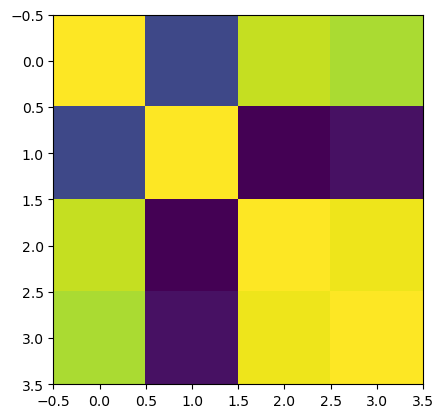

In [37]:
plt.imshow(df.corr())

A dataset can be either a positional or a keyword argument, so you can type `plt.imshow(X=df.corr())` or `plt.imshow(df.corr())` — the result would be the same.

There iss another important argument this function can take — `interpolation`. It takes a `str` that specifies an interpolation we want on our plot. The default value is `None`.

### Changing color and size
Let's add a `color bar`, a scale that specifies the meaning of colors in our plot. All we need for that is the `plt.colorbar()` function without any arguments.By default, a color bar is a vertical line on the right side of the plot. If you want to put it beneath the heatmap, you can use the optional argument `orientation` and set it as `orientation='horizontal'`.

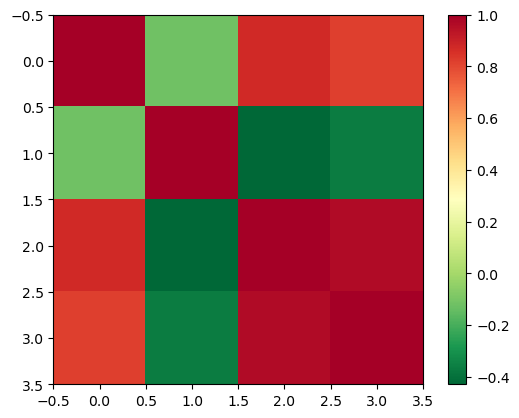

In [40]:
plt.imshow(df.corr(), cmap="RdYlGn_r")
plt.colorbar()
plt.show()

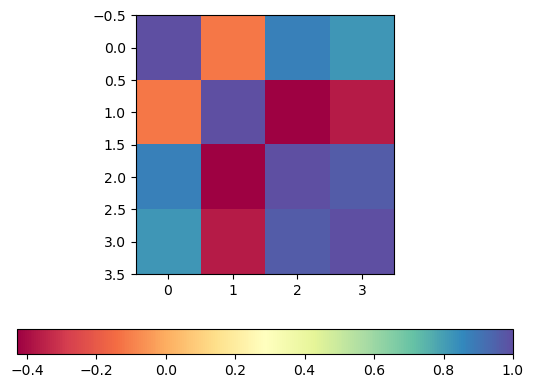

In [41]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar(orientation='horizontal')
plt.show()

We can also change the size of plot just need the `plt.gcf().set_size_inches()` function it takes two integers as its arguments.

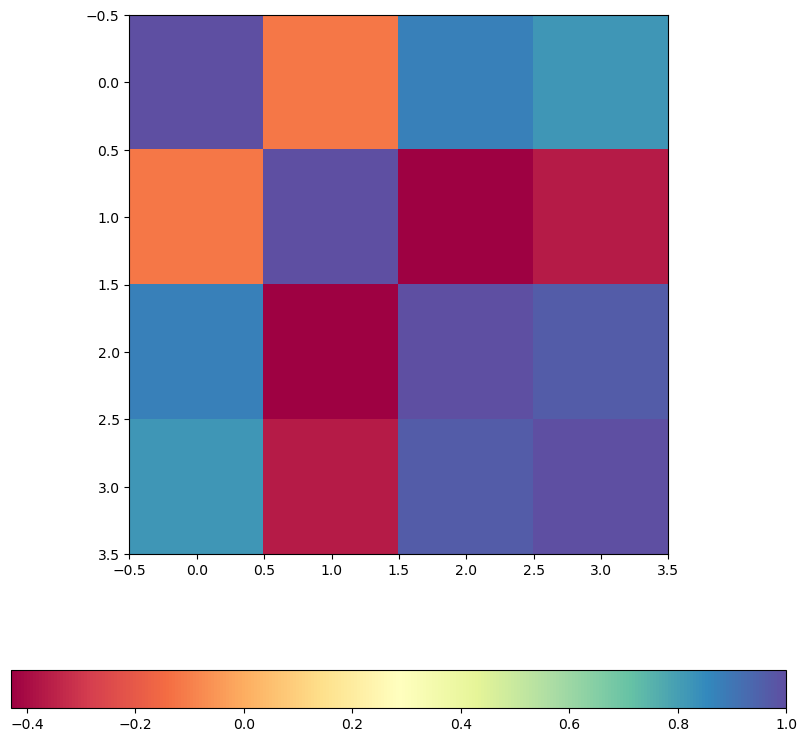

In [42]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar(orientation='horizontal')
plt.gcf().set_size_inches(10, 10)
plt.show()

### Adding labels
We can also add labels to our plot to make it more comprehensive. To add them to the plot, use functions `plt.xticks()` and `plt.yticks()` for `X`- and `Y`-axes.

In [43]:
range(len(df.corr().columns)), df.corr().columns

(range(0, 4),
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object'))

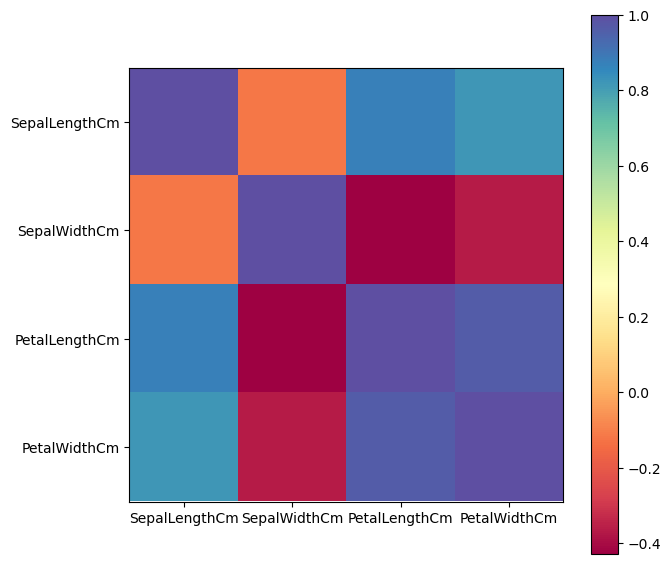

In [46]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(7, 7)
plt.xticks(range(len(df.corr().columns)), df.corr().columns)
plt.yticks(range(len(df.corr().columns)), df.corr().columns)
plt.show()

Now let's add values to cells and add a title to our plot.

In [47]:
df.corr().values

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

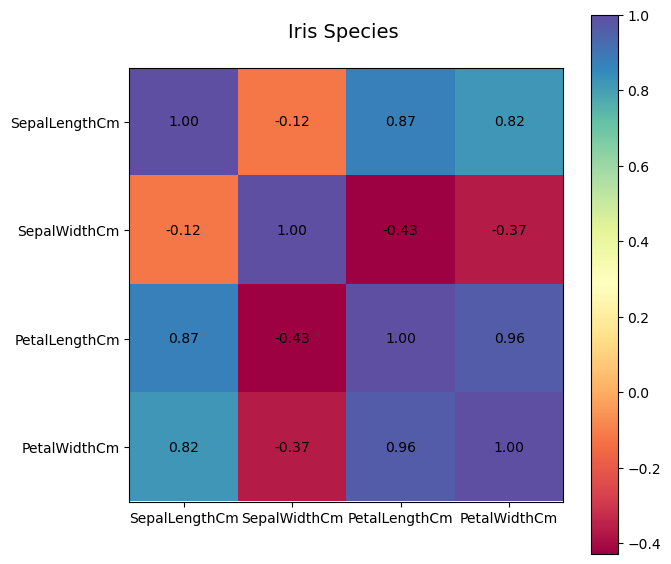

In [50]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(7, 7)
plt.xticks(range(len(df.corr().columns)), df.corr().columns)
plt.yticks(range(len(df.corr().columns)), df.corr().columns)

labels = df.corr().values
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        plt.text(i, j, '{:.2f}'.format(labels[i, j]), ha='center', va='center', color='black')
plt.title('Iris Species \n', fontsize=14)
plt.show()


<h1 style="text-align:center;background-color:skyblue;padding:10px;">The bar chart - HOMEWORK</h1>
A bar chart is a diagram where variables are represented as rectangular bars the taller or longer the bar, the higher value it represents. Usually, one axis of a bar chart represents a category, and the other is its value. A bar chart is used to compare discrete data, such as occurrences or proportions.

### Creating a bar chart
To create a bar chart with `matplotlib`, simply need to call the `bar()` function. The syntax for this method is as follows:

`plt.bar(x, height, width, bottom, align)`

where:

`x` is a category

`height` is the corresponding value.

`width` is how wide you want your bars(default value is `0.8`).

`bottom` is the base of the y-coordinate; in other words, it is the point where your bars start. The (default is `0`)

`align` is where you want to place your category names. By default, they are positioned at the bar center

Let's create our first simple bar graph. Suppose you want to compare the box office of the movies released in 2020 in the India.

### Labels
Let's make chart more illustrative adding labels and title.

### Gridlines
Another way to make chart more representative is adding gridlines. To add gridline call the `grid()` method and pass it as the parameters for `color`, `linestyle`, `width`, and `axis`. To make gridlines transparent need to tweak the alpha parameter. It can range from `0.0` to `1.0`.

## Horizontal bar chart
A bar chart can be display horizontally instead of vertically, just need to call the `barh()` function. But don't forget to switch the axes labels!

## Grouped bar plot
Plotting multiple bars next to each other can come in handy when we need to compare two or more data series that share categories.

## Stacked bar plot

A stacked bar chart is a type of graph that displays multiple data points on top of each other. In a stacked bar chart, each bar represents a single category that contains smaller categories. Use it to demonstrate how parts relate to the total amount.

In stacked bar plots need to provide the additional bottom parameter that indicates where the bar should start.

If you need to stack three or more categories, provide a sum of the previous category values to the bottom parameter.

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The Histogram</h1>
    
    
A `histogram` is a graphical display of data that organizes groups of data points into ranges. These ranges are represented by bars. It resembles a bar chart, but it's not quite the same. The key difference is that you use a bar chart for categorical data representation, while a histogram displays only numerical data. Examples of this might be age groups, or scores on a test. Rather than showing every single age a group might be, maybe you just show people from 20-25, 25-30... and so on.
    


### Creating a simple histogram

Let's say you've decided to plot the height of your classmate. Now, let's create a very simple histogram with only 10 values:

(array([3., 0., 1., 2., 1., 0., 2., 0., 0., 1.]),
 array([163. , 165.7, 168.4, 171.1, 173.8, 176.5, 179.2, 181.9, 184.6,
        187.3, 190. ]),
 <BarContainer object of 10 artists>)

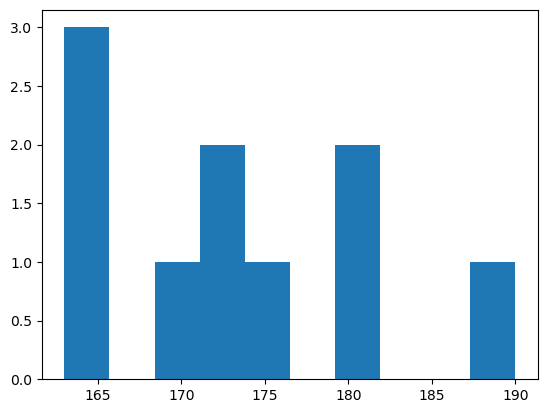

In [34]:
data = [163, 163, 164, 170, 180, 172, 173, 190,175,180]
plt.hist(data)

To make it clearer, we need to specify the values for `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`. The color can be change by using the color argument and adding a border between adjacent bars with `edgecolor`.

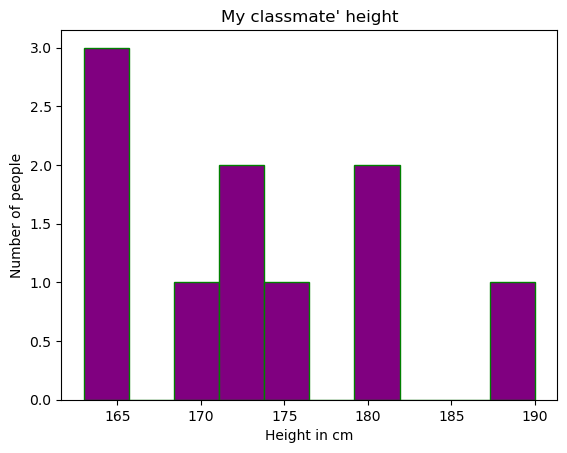

In [35]:
plt.hist(data, color="purple", edgecolor="green")
plt.title("My classmate' height")
plt.ylabel("Number of people")
plt.xlabel("Height in cm")
plt.show()

### Changing bins

Let's say we want to divide our data values into 3 groups: from 160 to 170 cm, from 170 to 180, and from 180 to 190. To do that, we need to pass a list of these values to the bins argument:

(array([3., 4., 3.]),
 array([160., 170., 180., 190.]),
 <BarContainer object of 3 artists>)

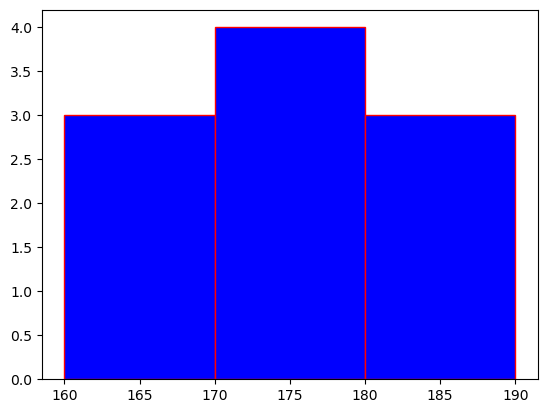

In [36]:
bins = [160, 170, 180, 190]
plt.hist(data, bins=bins, color='blue', edgecolor='red')

The `bins` argument can take not only a `list` but also an `int`. A `list` defines bin edges. An `int` defines the number of equal-width bins. So, if we want to have four bins in our histogram, we simply write `bins=4`. There's also a third option – use a `str` as bins value. It has to be a name of one of the binning functions supported by `numpy`, such as 'rice', 'scott', 'sqrt', and so on

### Cutting off data

Sometimes, you just don't need all the data that's in there. All you need to do is to pass a tuple to the range argument that specifies the start and end values. Assume that we only want to see people from 180 to 190 cm in our histogram:

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 190.]),
 <BarContainer object of 10 artists>)

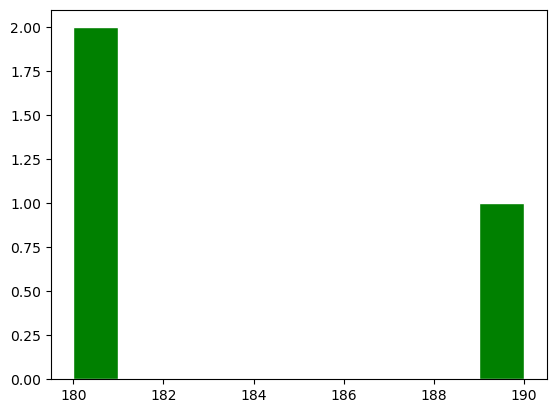

In [37]:
plt.hist(data, color="green", edgecolor='white', range=(180, 190))

### Plotting multiple datasets
To plot multiple datasets together to compare them you need to pass a list of datasets to `plt.hist()` and, preferably, add `plt.legend()` to make your plot easier to interpret.

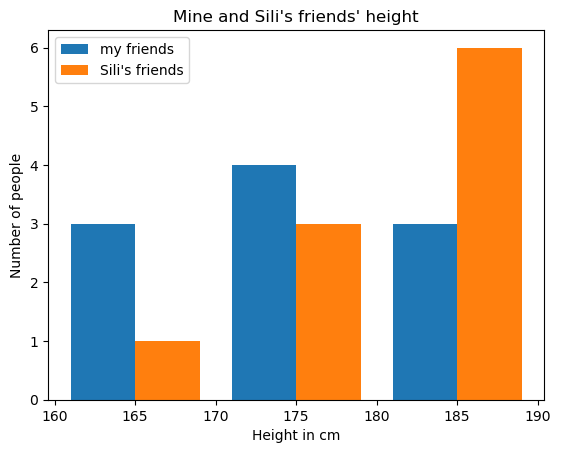

In [38]:
my_data = [163, 163, 164, 170, 170, 172, 173, 190,190,180]
sili_data = [161, 172, 174, 175, 181, 183, 186, 190,180,185]
bins = [160, 170, 180, 190]
names = ["my friends", "Sili's friends"]
plt.hist([my_data, sili_data], bins=bins, label=names)
plt.title("Mine and Sili's friends' height")
plt.ylabel("Number of people")
plt.xlabel("Height in cm")
plt.legend()
plt.show()

By default bars are placed side-by-side.The alternative way is to stack the values on top of each other. You can do that by setting the `stacked` argument to `True`. We also add `edgecolor` for better readability:

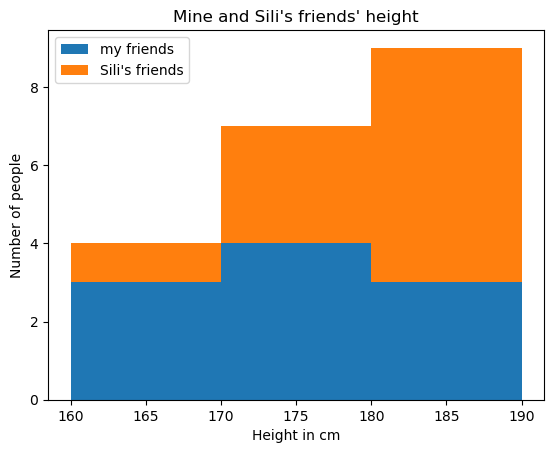

In [39]:
my_data = [163, 163, 164, 170, 170, 172, 173, 190,190,180]
sili_data = [161, 172, 174, 175, 181, 183, 186, 190,180,185]
bins = [160, 170, 180, 190]
names = ["my friends", "Sili's friends"]
plt.hist([my_data, sili_data], bins=bins, label=names, stacked=True)
plt.title("Mine and Sili's friends' height")
plt.ylabel("Number of people")
plt.xlabel("Height in cm")
plt.legend()
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The Scatter Plots - HOMEWORK</h1>

A scatter plot is a visualization of how two variables relate to each other by using plots. It is widely used for its simplicity in building a chart.

### Creating scatter plots

We can create a scatter plot by using `plt.scatter()`, where the arguments are the two variables you wish to compare as input arguments. The `scatter()` function also takes the `s` parameter as an argument that specifies the marker size.

### Understanding the parameters

Here’s a summary of key points to remember about the main input parameters:

|Parameter|Description|
|---------|-----------|
|x and y|These parameters represent two variables we want to show the relationship.|
|s|Defines the marker size.|
|c|Represents the marker color.|
|marker|Customizes the shape of the marker.|
|cmap|Selects the mapping between values and colors.|
|alpha|This parameter is a float number and represents the transparency of the markers.|

### Changing the colors of the plots

**Also, we may add a color bar to make more clear the visualization.**

### Customizing the marker

We can choose to show different markers. Let's change the way of showing plots by changing the marker parameter.

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The box plot</h1>

A **box plot** (also known as a **box-and-whisker** plot) is a convenient way to visualize the distributions of numerical data using quartiles. Box plots are widespread in descriptive statistics,they allow you to quickly explore one or more datasets.

## Box plot metrics
![Screenshot from 2021-10-01 14-45-23.png](attachment:1db355ac-23af-4e9f-a031-114f60949d15.png)

The summary metrics of a box plot are:

- The first and third quartiles (Q1 and Q3) that correspond to the 25th and 75th percentiles.
- An interquartile range (IQR) indicates the range of values from Q1 to Q3.
- A mean, the arithmetic average of all values.
- A median, the middle value of the data set.
- A minimum value excluding outliers. It is Q1−1.5×IQR
- A maximum value excluding outliers. It is Q3+1.5×IQR
- The outliers, or the observations that fall outside the 1.5×IQR rule. They are displayed as single points in line with whiskers.

The straight lines coming out of the box are whiskers. They indicate a degree of dispersion (also, variance) outside the first and third quartiles.

## Creating a box plot

The basic matplotlib syntax for plotting a box plot:

`plt.boxplot(data)`

where `data` is an array of data values.

There is a great number of optional arguments. Here are some of them:

- `vert`, if `False`, produces a horizontal box plot.
- `labels` is a sequence of strings that sets a label for each dataset.
- `showmeans`, if `True`, displays the mean values as a triangle on the box.
- `meanline`, if `True`, alongside with `showmeans=True` displays the mean as a line
- `boxprops`, `medianprops`, `meansprops`, `whiskerprops`, `capprops`, and `flierprops` allow us to change the properties of the box, median, mean, whiskers, caps, and outliers, respectively.

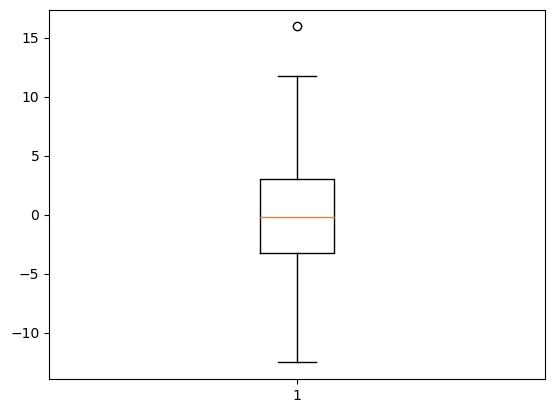

In [24]:
np.random.seed(23)
data = np.random.normal(0, 5, size=400)

plt.boxplot(data)
plt.show()

## Horizontal box plot

To create a horizontal boxplot, you need to set the `vert` argument to `False`:

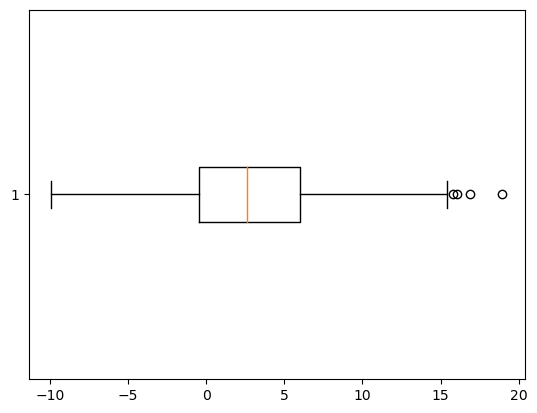

In [27]:
np.random.seed(23)
data = np.random.normal(3, 5, size=1000)

plt.boxplot(data, vert=False)
plt.show()

## Multiple box plots

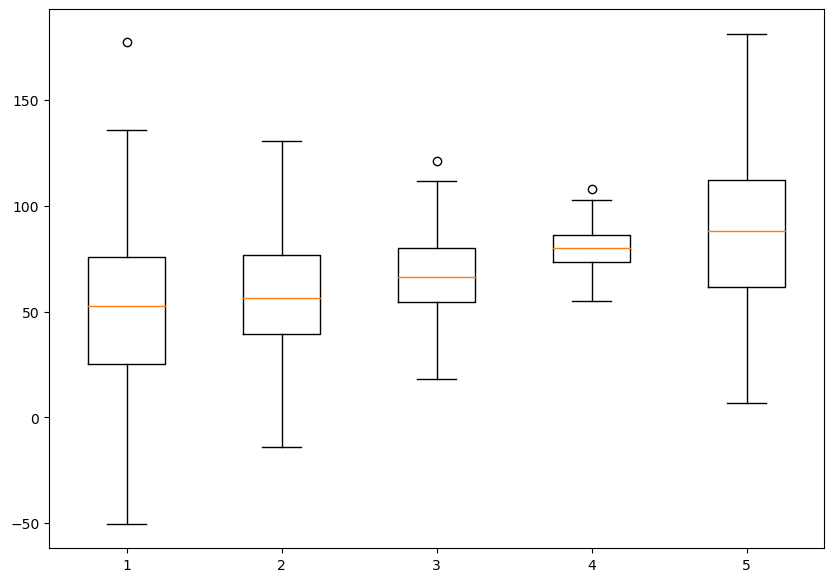

In [29]:
np.random.seed(23)

data_1 = np.random.normal(50, 40, 200)
data_2 = np.random.normal(60, 30, 200)
data_3 = np.random.normal(70, 20, 200)
data_4 = np.random.normal(80, 10, 200)
data_5 = np.random.normal(90, 35, 200)
data = [data_1, data_2, data_3, data_4, data_5]

plt.figure(figsize=(10, 7))
plt.boxplot(data)
plt.show()

## Box plot labels

To make the code a bit more readable, it is advised to create a separate list of labels and then pass it to the labels parameter. As for labeling the axes and giving a plot a title, it is a standard matplotlib procedure: you pass a string to the corresponding `plt.xlabel`, `plt.ylabel`, or `plt.title` parameter with an optional `fontsize` argument:

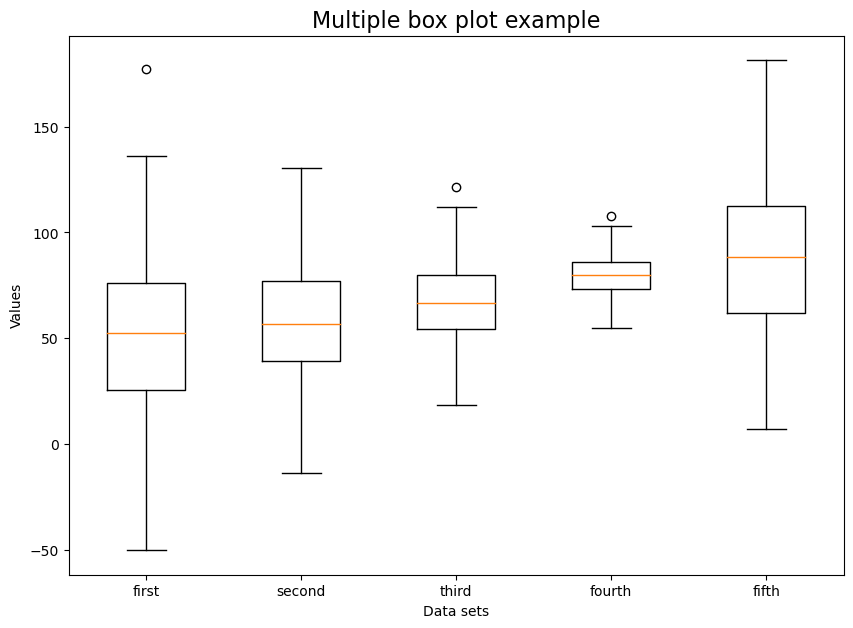

In [31]:
np.random.seed(23)

data_1 = np.random.normal(50, 40, 200)
data_2 = np.random.normal(60, 30, 200)
data_3 = np.random.normal(70, 20, 200)
data_4 = np.random.normal(80, 10, 200)
data_5 = np.random.normal(90, 35, 200)

data = [data_1, data_2, data_3, data_4, data_5]

plt.figure(figsize =(10, 7))

labels = ['first', 'second', 'third', 'fourth', 'fifth']

plt.boxplot(data, labels=labels)
plt.ylabel('Values')
plt.xlabel('Data sets')
plt.title('Multiple box plot example', fontsize=16)

plt.show()

## Box plot colors

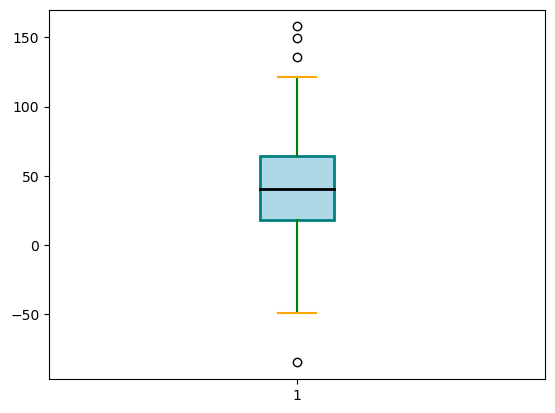

In [32]:
boxprops = {'facecolor': 'lightblue', 'edgecolor': 'teal', 'linewidth': 2.0}
whiskerprops = {'color': 'green', 'linewidth': 1.5}
capprops = {'color': 'orange', 'linewidth': 1.5}
medianprops = {'color': 'black', 'linewidth': 2}

np.random.seed(14)
data = np.random.normal(50, 40, size=200)

plt.boxplot(data,
            patch_artist=True,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops)

plt.show()

Here is a list of some properties of a box plot that you can customize:

    boxprops = {'color': 'b', 'facecolor': 'none', 'linestyle': '-', 'linewidth': 1.0}

    medianprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0}

    whiskerprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0}

    capprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0}

    flierprops = {'color': 'b', 'marker': 'o',
                  'markerfacecolor': 'none', 'markeredgecolor': 'k'}

    meanprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0,
                 'marker': '^', 'markerfacecolor': 'g', 'markeredgecolor': 'k'}

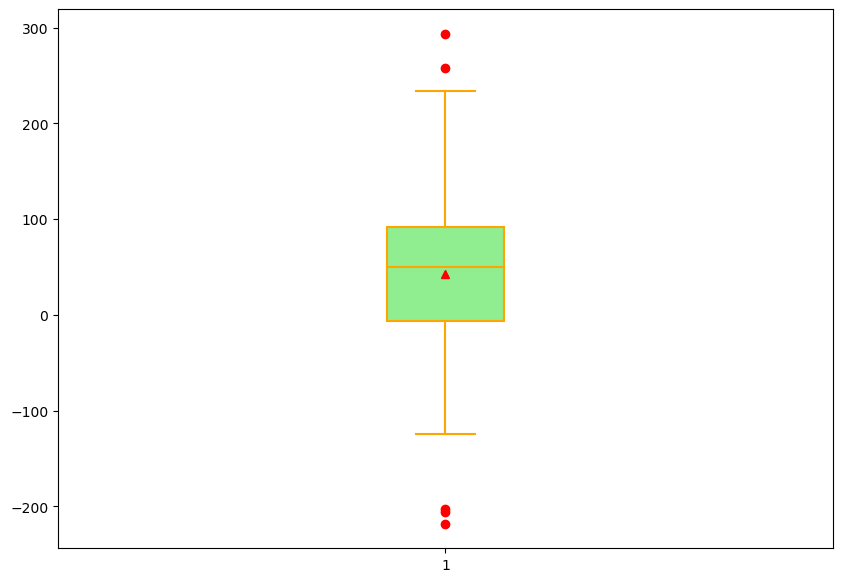

In [33]:
data = np.random.normal(50, 80, size=200)
plt.figure(figsize=(10, 7))
plot = plt.boxplot(data, patch_artist=True, showmeans=True)

edge_color = 'orange'
fill_color = 'lightgreen'
marker_color = 'red'

for prop in ['boxes', 'whiskers', 'means', 'medians', 'caps']:
    plt.setp(plot[prop], color=edge_color, linewidth=1.5)
    
for prop in ['boxes']:
    plt.setp(plot[prop], facecolor=fill_color)
    
for prop in ['fliers', 'means']:
    plt.setp(plot[prop], markerfacecolor=marker_color,
             markeredgecolor=marker_color)
    
plt.show()